In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import data_reader as dr

In [8]:
# data, source = dr.read('kospi.csv')

data = pd.read_csv('dataset/kospi.csv')
oil = pd.read_csv('dataset/oilprice.csv')

In [9]:
data.isna().sum()
data = data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456 entries, 0 to 2461
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2456 non-null   object 
 1   Open       2456 non-null   float64
 2   High       2456 non-null   float64
 3   Low        2456 non-null   float64
 4   Close      2456 non-null   float64
 5   Adj Close  2456 non-null   float64
 6   Volume     2456 non-null   float64
dtypes: float64(6), object(1)
memory usage: 153.5+ KB


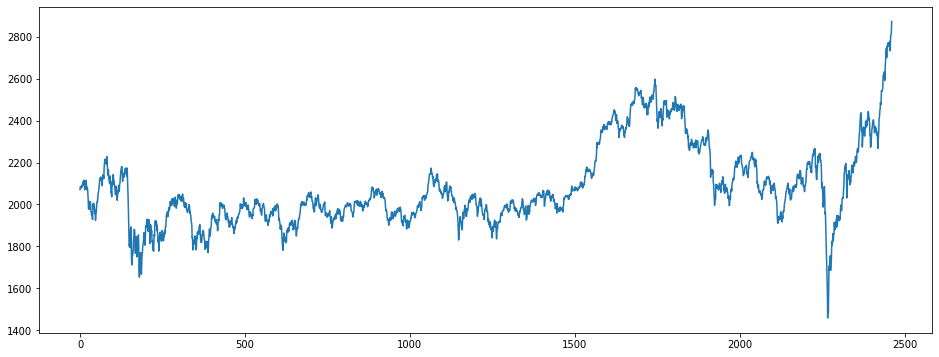

In [12]:
plt.figure(1, figsize=(16,6))
plt.plot(data['Close'])
plt.savefig('images/prices')

In [13]:
data['returns'] = data.Close.pct_change()

In [14]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,returns
0,2011-01-03,2063.689941,2070.090088,2054.830078,2070.080078,2070.080078,354100.0,NaN
1,2011-01-04,2074.560059,2085.139893,2069.120117,2085.139893,2085.139893,415900.0,0.007275
2,2011-01-05,2083.100098,2087.139893,2076.919922,2082.550049,2082.550049,386100.0,-0.001242
3,2011-01-06,2094.350098,2096.649902,2066.100098,2077.610107,2077.610107,407800.0,-0.002372
4,2011-01-07,2073.679932,2086.199951,2068.659912,2086.199951,2086.199951,335600.0,0.004134


In [15]:
data['log_returns'] = np.log(1+data['returns'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,returns,log_returns
0,2011-01-03,2063.689941,2070.090088,2054.830078,2070.080078,2070.080078,354100.0,NaN,NaN
1,2011-01-04,2074.560059,2085.139893,2069.120117,2085.139893,2085.139893,415900.0,0.007275,0.007249
2,2011-01-05,2083.100098,2087.139893,2076.919922,2082.550049,2082.550049,386100.0,-0.001242,-0.001243
3,2011-01-06,2094.350098,2096.649902,2066.100098,2077.610107,2077.610107,407800.0,-0.002372,-0.002375
4,2011-01-07,2073.679932,2086.199951,2068.659912,2086.199951,2086.199951,335600.0,0.004134,0.004126


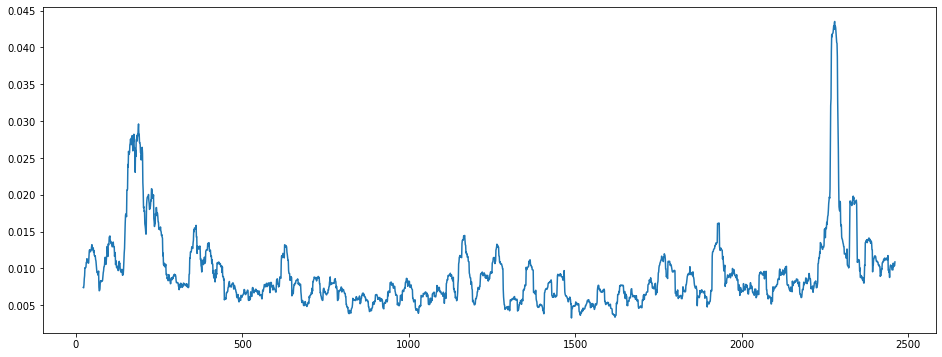

In [17]:
plt.figure(1, figsize=(16,6))
plt.plot(data.log_returns.rolling(window=22).std())
plt.savefig('images/realized_vol')

In [10]:
data.dropna(inplace=True)
trainX = data[['Close', 'log_returns']].values

In [11]:
trainX

array([[ 1.93053003e+03,  6.11544236e-03],
       [ 1.92543005e+03, -2.64524417e-03],
       [ 1.90432996e+03, -1.10191299e-02],
       ...,
       [ 2.80860010e+03,  6.19714500e-04],
       [ 2.82051001e+03,  4.23154976e-03],
       [ 2.87346997e+03,  1.86026254e-02]])

In [12]:
scaler = StandardScaler().fit(trainX)
x_scaled = scaler.transform(trainX)

In [13]:
x_scaled[:5]

array([[-1.24495233,  0.54544016],
       [-1.26955749, -0.28068424],
       [-1.37135629, -1.07033368],
       [-1.30723763,  0.62457321],
       [-1.41714136, -1.15815599]])

In [14]:
y = [x[0] for x in x_scaled]

In [15]:
y[:5]

[-1.244952326227026,
 -1.2695574882393907,
 -1.3713562872073786,
 -1.3072376272638218,
 -1.4171413629078906]

In [16]:
split = int(len(x_scaled) * 0.8)
print(split)

975


In [17]:
trainX = x_scaled[:split]
testX = x_scaled[split:len(x_scaled)]
trainY = y[:split]
testY = y[split:len(y)]

In [165]:
assert len(trainX) == len(trainY)
assert len(testX) == len(testY)

In [18]:
n = 3
Xtrain = []
ytrain = []
Xtest = []
ytest = []
for i in range(n, len(trainX)):
    Xtrain.append(trainX[i-n:i, :trainX.shape[1]])
    ytrain.append(trainY[i])
for i in range(n, len(testX)):
    Xtest.append(testX[i-n:i, :testX.shape[1]])
    ytest.append(testY[i])

In [168]:
data.head(5)

,Open,High,Low,Close,Volume,returns,log_returns
1,1911.930054,1937.569946,1911.930054,1930.530029,446500.0,0.006134,0.006115
2,1934.250000,1934.250000,1911.609985,1925.430054,594600.0,-0.002642,-0.002645
3,1915.709961,1926.410034,1901.239990,1904.329956,393000.0,-0.010959,-0.011019
4,1889.420044,1918.250000,1883.819946,1917.619995,430200.0,0.006979,0.006955
5,1897.180054,1907.430054,1892.689941,1894.839966,328800.0,-0.011879,-0.011950


In [169]:
Xtrain[0]

array([[-1.24495233,  0.54544016],
       [-1.26955749, -0.28068424],
       [-1.37135629, -1.07033368]])

In [171]:
ytrain[0]

-1.3072376272638218

In [172]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [173]:
scaler.inverse_transform(val)

array([[1.91762000e+03, 3.31288925e-04]])

In [176]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [177]:
print(Xtrain.shape)
print(ytrain.shape)
print("-----")
print(Xtest.shape)
print(ytest.shape)

(972, 3, 2)
(972,)
-----
(241, 3, 2)
(241,)


In [178]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [180]:
model = Sequential()
model.add(LSTM(4, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer = 'adam')
model.fit(Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest), batch_size=16)

Epoch 1/100
61/61 [==============================] - 2s 8ms/step - loss: 0.7252 - val_loss: 1.6871
Epoch 2/100
61/61 [==============================] - 0s 3ms/step - loss: 0.6240 - val_loss: 1.4095
Epoch 3/100
61/61 [==============================] - 0s 3ms/step - loss: 0.4567 - val_loss: 1.0738
Epoch 4/100
61/61 [==============================] - 0s 3ms/step - loss: 0.2730 - val_loss: 0.7401

In [181]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 4)                 112       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [182]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

In [183]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [184]:
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [185]:
print(trainPredict[:5])
print(testPredict[:5])

[1912.9849676712915, 1922.456523602975, 1904.268389582266, 1901.2852449283703, 1919.8934535130793]
[2208.151940812555, 2235.2523467371757, 2242.2606469258017, 2231.3859607819, 2248.2501625197037]


In [186]:
from sklearn.metrics import mean_squared_error

In [188]:
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPredict, squared=False)
print("Train Score: %.2 RMSE", (trainScore))
testScore = mean_squared_error([x[0][0] for x in Xtest], testPredict, squared=False)
print("Test Score: %.2 RMSE", (testScore))

Train Score: %.2 RMSE 2188.533504878314
Test Score: %.2 RMSE 2230.3807613161725
